<h2>Testing Baseline

In [ ]:
!gdown --id 1hXzB6JOW9BczQmuIPYmNbGoI6aSdz2VS #baseline dataset
!gdown --id 1Ijj9IrYxr_8E6auPazrHjQLbPZKwC36J #baseline network
!gdown --id 1b8rd3IZmwygeuh3EdZ6wufzhN5fxt7NE #baseline utils
!gdown --id 1XfV8pVN39Rwl--2wI2rQ1paZSV4N1VsY #Glove
!gdown --id 1cQnxpWJwSUitkzX5mOiNpuF33poY2mR- #Annotation File
!gdown --id 1NpjqA_JEBAyknS5NElkX_5xuUQq65abH #Final Model Baseline

!unzip Glove.zip
!unzip /content/annotation_file.zip

In [ ]:
!pip install contractions

In [3]:
import os
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
from torch.optim import Adam
from torch.utils.data import DataLoader
from baseline_dataset import *
from baseline_network import *
from baseline_utils import *

Using cuda device


In [4]:
roletolabel = {'hero' : 0, 'villain' : 1, 'victim' : 2, 'other' : 3}
path = "./Glove/glove.6B.100d.txt"
vocab , embeddings_np = embedding(path)

In [5]:
!gdown --id 1vUfVe6hRyoJEHOK-GuaRUv5WOYiNIZBi #test.csv
dataset = Custom(None, r"/content/test.csv", vocab, None, freq_threshold = 3, roletolabel = roletolabel)
pad_idx = dataset.vocab.stoi["<PAD>"]

test_loader = DataLoader(dataset=dataset, batch_size = 512, num_workers = 0, shuffle=True, pin_memory=True, 
                    collate_fn = MyCollate(pad_idx = pad_idx), drop_last = False)

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1vUfVe6hRyoJEHOK-GuaRUv5WOYiNIZBi
To: /content/test.csv
100% 430k/430k [00:00<00:00, 145MB/s]


In [6]:
model = Model(no_layers = 2, embs_weigth = embeddings_np, dimensions = 128, no_of_classes = 4).to(device)
criterion = nn.CrossEntropyLoss()
PATH = "./Baseline-final-model.pth"
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

100%|██████████| 5/5 [00:01<00:00,  2.86it/s]


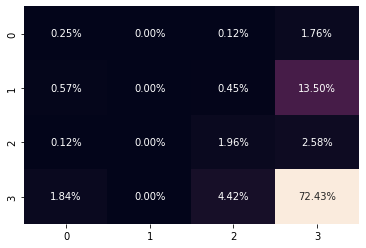

In [7]:
test_loss = 0
model.eval()
with torch.no_grad():            
    for (text, entity, role) in tqdm(test_loader):
        text = text.to(device=device, dtype = torch.int32)
        entity = entity.to(device=device, dtype = torch.int32)
        labels = role.to(device=device, dtype = torch.int64)
        hidden = [torch.zeros((2, text.shape[0], 128), dtype = torch.float32).to(device=device),
            torch.zeros((2, text.shape[0], 128), dtype = torch.float32).to(device=device)]                
        out = model(text, entity, hidden) 
        loss = criterion(out, labels)       
        test_loss += loss.item()
acc_test, f1_test = score(model, test_loader, device)

In [8]:
print(f"Test Loss: {test_loss/len(test_loader)} -----> Test Accuracy: {acc_test} %, Test Macro F1 Score : {f1_test}")

Test Loss: 0.8389020204544068 -----> Test Accuracy: 74.64212678936606 %, Test Macro F1 Score : 0.3238619200070917


<h1> Testing glove embedding with co-attention network

In [19]:
!pip install tqdm boto3 requests regex sentencepiece sacremoses
!pip install --upgrade --no-cache-dir gdown
!pip install contractions
!gdown --id 142fSKiVRQJMRZVmnjbgibja5YJPUqCYC #utils
!gdown --id 1dNC346NPLosiJpc8DdoCf_YQJtjUhAkg #dataset
!gdown --id 1XfV8pVN39Rwl--2wI2rQ1paZSV4N1VsY #Glove
!gdown --id 1_KicOVpq_Ny1hezFgy21z_WXpEBNzMQY #text free images
!gdown --id 1cQnxpWJwSUitkzX5mOiNpuF33poY2mR- #Annotation File
!pip install transformers
!gdown --id 1Q2RhQA14AKNwxAfv1PuRsPS80sqtcX-H #utils glove
!gdown --id 1_so3eGJ4l_Td1TWjuVlSRIKfFLezB6r1 #network glove 
!gdown --id 1aUVV3f4-ftU1hhoXLRiOf0LJ7SLEG7_r #dataset glove
!gdown --id 1iOU9hLiRxRU6Kg7lyHzQ2og7slWZPyNc #utils distilbert
!gdown --id 1qxUViBIC9xQD39eGgKi8WWi7SzmFqlKH #network distilbert
!gdown --id 1T4qiubSRvHkVLgRbNhpvRCLXsZ3o4Ncf #dataset distilbert
!gdown --id 1Bm_mnWN2lrCcrvtDOh10JtXlowYc4Jfo #utils transformer 
!gdown --id 1JD0iEu-1hbqpEnAokjXj6YhohkYdw2h6 #network transformer
!gdown --id 1AzwmDr5e4dzNtEjCP9PE8bUc_zRv12P5 #dataset transformer

     |████████████████████████████████| 132 kB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 48.1 MB/s 
     |████████████████████████████████| 895 kB 90.4 MB/s 
     |████████████████████████████████| 8.7 MB 67.3 MB/s 
     |████████████████████████████████| 79 kB 10.7 MB/s 
     |████████████████████████████████| 138 kB 101.2 MB/s 
     |████████████████████████████████| 127 kB 102.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=142fSKiVRQJMRZVmnjbgibja5YJPUqCYC
To: /content/utils.py
100% 3.47k/3.47k [00:00<00:00, 6.65MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1dNC346NPLosiJpc8DdoCf_YQJtjUhAkg
To: /content/dataset.py
100% 9.24k/9.24k [00:00<00:00, 18.5MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https:/

In [20]:
from utils_glove import *
from network_glove import *
from dataset_glove import *
from utils_distilbert import *
from network_distilbert import *
from dataset_distilbert import *
from utils_transformer import *
from network_transformer import *
from dataset_transformer import *

Using cuda device


Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Using cuda device


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Using cuda device


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [21]:
from transformers import DistilBertTokenizer, DistilBertModel, DistilBertConfig

In [22]:
!gdown --id 1vUfVe6hRyoJEHOK-GuaRUv5WOYiNIZBi #test.csv

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1vUfVe6hRyoJEHOK-GuaRUv5WOYiNIZBi
To: /content/test.csv
100% 430k/430k [00:00<00:00, 144MB/s]


In [23]:
#Load model
from google.colab import drive
import shutil

def load_model(model):
  drive.mount('/content/drive')
  shutil.copy("/content/drive/MyDrive/Dl thesis/model/" + model, '/content/')
  print("Model Loaded")
  drive.flush_and_unmount()

In [24]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [25]:
!unzip test_text_free.zip

Archive:  test_text_free.zip
   creating: text_free/
  inflating: text_free/memes_4835.png  
  inflating: text_free/covid_memes_5625.png  
  inflating: text_free/memes_1256.png  
  inflating: text_free/covid_memes_5661.png  
  inflating: text_free/memes_8048.png  
  inflating: text_free/memes_209.png  
  inflating: text_free/covid_memes_5595.png  
  inflating: text_free/covid_memes_1058.png  
  inflating: text_free/memes_4504.png  
  inflating: text_free/memes_4770.png  
  inflating: text_free/memes_4382.png  
  inflating: text_free/memes_3477.png  
  inflating: text_free/memes_6336.png  
  inflating: text_free/covid_memes_235.png  
  inflating: text_free/covid_memes_5681.png  
  inflating: text_free/covid_memes_1893.png  
  inflating: text_free/memes_1040.png  
  inflating: text_free/memes_4576.png  
  inflating: text_free/covid_memes_237.png  
  inflating: text_free/memes_3520.png  
  inflating: text_free/memes_1335.png  
  inflating: text_free/memes_8225.png  
  inflating: text_free

In [26]:
!unzip Glove.zip

Archive:  Glove.zip
replace Glove/glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [27]:
!mv text_free Images
!ls

annotation_file		  network_distilbert.py
annotation_file.zip	  network_glove.py
baseline_dataset.py	  network_transformer.py
Baseline-final-model.pth  __pycache__
baseline_network.py	  resnet152.pth
baseline_utils.py	  sample_data
dataset_bimpm_multi.py	  test.csv
dataset_distilbert.py	  test_text_free.zip
dataset_glove.py	  undersampled_decay_final_encoder_multimodal.pth
dataset.py		  undersampled_decay_final_model_multimodal.pth
dataset_transformer.py	  utils_bimpm_multi.py
Glove			  utils_distilbert.py
Glove.zip		  utils_glove.py
Images			  utils.py
__MACOSX		  utils_transformer.py
network_bimpm_multi.py


In [28]:
import os
import torch
import numpy as np
from torch.optim import Adam
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch import cuda, dropout  
import torch.nn as nn

In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
# path = "./Glove/glove.6B.100d.txt"
# vocab , embeddings_np = embedding(path)

In [30]:
transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
roletolabel = {'hero' : 0, 'villain' : 1, 'victim' : 2, 'other' : 3}

In [31]:
test_dataset = Custom(r"Images", r"./test.csv",   vocab, transform, freq_threshold = 3, roletolabel = roletolabel)
pad_idx = test_dataset.vocab.stoi["<PAD>"]
test_loader = DataLoader(dataset=test_dataset, batch_size = 32, num_workers = 0, shuffle=True, pin_memory=True,
                         collate_fn = MyCollate(pad_idx = pad_idx), drop_last = False)

In [32]:
load_model(f"final_attention_model.pth")

Mounted at /content/drive
Model Loaded


In [33]:
ocr_encoder = ocr_Encoder(no_layers = 2, dropout = 0.2, embs_weight = embeddings_np)
entity_encoder = entity_Encoder(no_layers = 2, dropout = 0.2, embs_weight = embeddings_np)
model = Model(ocr_encoder, entity_encoder, no_of_classes = 4).to(device)

model.load_state_dict(torch.load(f'./final_attention_model.pth'))

<All keys matched successfully>

In [34]:
criterion = nn.CrossEntropyLoss()

In [35]:
model.eval()
correct = 0
total_size = 0
y_hat = [] 
y_gt = []
test_loss = 0.0
correct = 0
with torch.no_grad():          
  for (text, image, entity, role) in tqdm(test_loader):
    text = text.to(device=device, dtype = torch.int32)
    entity = entity.to(device=device, dtype = torch.int32)
    role = role.to(device=device, dtype = torch.int64)
    feature = vgg(image.to(device = device, dtype = torch.float32))
    feature = torch.flatten(feature, start_dim=2)
    feature = feature.permute(0, 2, 1)
    y_pred = model(text, entity, feature)
    loss = criterion(y_pred, role)
    test_loss += loss.item()
    total_size += y_pred.shape[0]
    pred = torch.argmax(y_pred, dim = 1)
    correct += (role == pred).sum()
    y_gt.extend(role.cpu().int().numpy())
    y_hat.extend(pred.cpu().int().numpy())

macro = f1_score(y_gt, y_hat, average='macro') 
weighted = f1_score(y_gt, y_hat, average='weighted')
print(confusion_matrix(y_gt, y_hat))
acc_val, macro_val, weighted_val = (correct.item() * 100) / total_size, macro, weighted

100%|██████████| 77/77 [00:23<00:00,  3.25it/s]

[[  20    1    6   25]
 [  92   33   37  193]
 [  27   12   15   60]
 [ 418  148  159 1199]]


In [36]:
print(f"Test Loss: {(test_loss/len(test_loader)):.4f} -----> Test Accuracy: {acc_val:.4f} , Test Macro F1 Score : {macro_val:.4f}, Test Weighted F1 Score : {weighted_val:.4f}")

Test Loss: 1.3177 -----> Test Accuracy: 51.8200 , Test Macro F1 Score : 0.2454, Test Weighted F1 Score : 0.5779


<h1> testing co-attention with distilbert embeddings

In [ ]:
transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
roletolabel = {'hero' : 0, 'villain' : 1, 'victim' : 2, 'other' : 3}

In [ ]:
test_dataset = Custom_emb(r"Images", r"./test.csv",  transform, max_length = 100, roletolabel = roletolabel)
test_loader = DataLoader(dataset=test_dataset, batch_size = 32, num_workers = 0, shuffle=True, pin_memory=True)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
embeddings = DistilBertModel.from_pretrained("distilbert-base-uncased")

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
load_model(f"final_attention_model_emb.pth")

Mounted at /content/drive
Model Loaded


In [ ]:
ocr_encoder = ocr_Encoder_emb(no_layers = 2, dropout = 0.2, embedding = embeddings)
entity_encoder = entity_Encoder_emb(no_layers = 2, dropout = 0.2, embedding = embeddings)
model = Model_emb(ocr_encoder, entity_encoder, no_of_classes = 4).to(device)

In [ ]:
model.load_state_dict(torch.load('final_attention_model_emb.pth'))

<All keys matched successfully>

In [ ]:
model.eval()
correct = 0
total_size = 0
y_hat = [] 
y_gt = []
test_loss = 0.0
with torch.no_grad():
  for(entity, text, image, role) in tqdm(test_loader):
    entity["input_ids"] = entity["input_ids"].to(device,dtype = torch.int32)
    entity["attention_mask"] = entity["attention_mask"].to(device,dtype = torch.int32)
    text["input_ids"] = text["input_ids"].to(device, dtype = torch.int32)
    text["attention_mask"] = text["attention_mask"].to(device, dtype = torch.int32)
    role = role.to(device=device, dtype = torch.int64)
    feature = vgg(image.to(device = device, dtype = torch.float32))
    feature = torch.flatten(feature, start_dim=2)
    feature = feature.permute(0, 2, 1)
    y_pred = model(text, entity, feature)
    loss = criterion(y_pred, role)
    test_loss += loss.item()
    pred = torch.argmax(y_pred, dim = 1)
    correct += (role == pred).sum()
    total_size += y_pred.shape[0]
    y_gt.extend(role.cpu().int().numpy())
    y_hat.extend(pred.cpu().int().numpy())
macro = f1_score(y_gt, y_hat, average='macro') 
weighted = f1_score(y_gt, y_hat, average='weighted')
print(confusion_matrix(y_gt, y_hat))
acc_val, macro_val, weighted_val = (correct.item() * 100) / total_size, macro, weighted

100%|██████████| 77/77 [00:45<00:00,  1.68it/s]

[[   6   12    5   29]
 [  16  136   47  156]
 [   1   33   34   46]
 [  62  437  231 1194]]


In [ ]:
print(f"Test Loss: {(test_loss/len(test_loader)):.4f} -----> Test Accuracy: {acc_val:.4f} , Test Macro F1 Score : {macro_val:.4f}, Test Weighted F1 Score : {weighted_val:.4f}")


Test Loss: 3.3708 -----> Test Accuracy: 56.0327 , Test Macro F1 Score : 0.3095, Test Weighted F1 Score : 0.6109


<h1> transformer co-attention

In [ ]:
transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
roletolabel = {'hero' : 0, 'villain' : 1, 'victim' : 2, 'other' : 3}

In [ ]:
test_dataset = Custom_Tfm(r"Images", r"./test.csv",  transform, max_length = 100, roletolabel = roletolabel)
test_loader = DataLoader(dataset=test_dataset, batch_size = 32, num_workers = 0, shuffle=True, pin_memory=True)

In [ ]:
ocr_encoder = ocr_Encoder_transformer(no_layers = 2, dropout = 0.2, embedding = embeddings)
entity_encoder = entity_Encoder_transformer(no_layers = 2, dropout = 0.2, embedding = embeddings)
model = Model_Transformer(ocr_encoder, entity_encoder, no_of_classes = 4).to(device)

In [ ]:
load_model(f"final_attention_model_tfm_{3e-6}.pth")

Mounted at /content/drive
Model Loaded


In [ ]:
model.load_state_dict(torch.load(f'./final_attention_model_tfm_{3e-6}.pth'))

<All keys matched successfully>

In [ ]:
model.eval()
correct = 0
total_size = 0
y_hat = [] 
y_gt = []
test_loss = 0.0
with torch.no_grad():
  for(entity, text, image, role) in tqdm(test_loader):
    entity["input_ids"] = entity["input_ids"].to(device,dtype = torch.int32)
    entity["attention_mask"] = entity["attention_mask"].to(device,dtype = torch.int32)
    text["input_ids"] = text["input_ids"].to(device, dtype = torch.int32)
    text["attention_mask"] = text["attention_mask"].to(device, dtype = torch.int32)
    role = role.to(device=device, dtype = torch.int64)
    feature = vgg(image.to(device = device, dtype = torch.float32))
    feature = torch.flatten(feature, start_dim=2)
    feature = feature.permute(0, 2, 1)
    y_pred = model(text, entity, feature)
    loss = criterion(y_pred, role)
    test_loss += loss.item()
    pred = torch.argmax(y_pred, dim = 1)
    correct += (role == pred).sum()
    total_size += y_pred.shape[0]
    y_gt.extend(role.cpu().int().numpy())
    y_hat.extend(pred.cpu().int().numpy())
macro = f1_score(y_gt, y_hat, average='macro') 
weighted = f1_score(y_gt, y_hat, average='weighted')
print(confusion_matrix(y_gt, y_hat))
acc_val, macro_val, weighted_val = (correct.item() * 100) / total_size, macro, weighted

100%|██████████| 77/77 [00:50<00:00,  1.52it/s]

[[  10   14    4   24]
 [  22  148   31  154]
 [   5   33   28   48]
 [ 118  569   96 1141]]


In [ ]:
print(f"Test Loss: {(test_loss/len(test_loader)):.4f} -----> Test Accuracy: {acc_val:.4f} , Test Macro F1 Score : {macro_val:.4f}, Test Weighted F1 Score : {weighted_val:.4f}")

Test Loss: 3.7649 -----> Test Accuracy: 54.2740 , Test Macro F1 Score : 0.3149, Test Weighted F1 Score : 0.5957


<h1> Final results of BiMPM MultiModal Network

In [9]:
!gdown --id 1LlEA3Z0X6SA11KK6CHVugUuDRF8H1wDS # utils Bimpm
!gdown --id 1O_35Y7yhCvNvzo48OAUJ8tbJJyn8tiSI # dataset Bimpm
!gdown --id 138Xn0CtAs6BDQ0TXFzWnkDA4Ij2p5kdH # network Bimpm
!gdown --id 1YYrS-uDP71m373ldBNIONAO4xZhiPuny  #resne152.pth

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1LlEA3Z0X6SA11KK6CHVugUuDRF8H1wDS
To: /content/utils_bimpm_multi.py
100% 2.53k/2.53k [00:00<00:00, 5.11MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1O_35Y7yhCvNvzo48OAUJ8tbJJyn8tiSI
To: /content/dataset_bimpm_multi.py
100% 4.41k/4.41k [00:00<00:00, 8.23MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Down

In [45]:
#Load necessary files
from dataset_bimpm_multi import *
from network_bimpm_multi import myResnet, MMIAN, resnet152
from utils_bimpm_multi import load_model, save_model, score, embedding

In [38]:
# roletolabel = {'hero' : 0, 'villain' : 1, 'victim' : 2, 'other' : 3}
# path = "./Glove/glove.6B.100d.txt"
# vocab , embeddings_np = embedding(path)

In [46]:

transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
test_dataset = Custom(r"Images", r"./test.csv", vocab, transform, freq_threshold = 3, roletolabel = roletolabel)
pad_idx = test_dataset.vocab.stoi["<PAD>"]
test_loader = DataLoader(dataset = test_dataset, batch_size = 128, num_workers = 0, shuffle=True, pin_memory=True, 
                    collate_fn = MyCollate(pad_idx = pad_idx), drop_last = False)
print(len(test_loader), len(test_loader.dataset))

20 2445


In [47]:
net = resnet152()
net.load_state_dict(torch.load(os.path.join('/content', 'resnet152.pth')))
encoder = myResnet(net, True, device).to(device)
criterion = nn.CrossEntropyLoss()
model = MMIAN(embeddings_np ,device).to(device)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [41]:
load_model("undersampled_decay_final_model_multimodal.pth")
load_model("undersampled_decay_final_encoder_multimodal.pth")

Mounted at /content/drive
Model Loaded
Mounted at /content/drive
Model Loaded


In [48]:
if(os.path.exists(f"./undersampled_decay_final_model_multimodal.pth")):
    model.load_state_dict(torch.load(f'./undersampled_decay_final_model_multimodal.pth', map_location = torch.device('cpu')))
    print("Pretrained model Loaded")

if(os.path.exists(f"./undersampled_decay_final_encoder_multimodal.pth")):
    encoder.load_state_dict(torch.load(f'./undersampled_decay_final_encoder_multimodal.pth', map_location = torch.device('cpu')))
    print("Pretrained encoder model Loaded")

Pretrained model Loaded
Pretrained encoder model Loaded


In [49]:
model.eval()
encoder.eval()
test_loss = 0.0
correct = 0
total_size = 0
y_hat = [] 
y_gt = []
with torch.no_grad():            
  for (text, image, entity, role) in tqdm(test_loader):
    text = text.to(device=device, dtype = torch.int32)
    entity = entity.to(device=device, dtype = torch.int32)
    role = role.to(device=device, dtype = torch.int64)
    with torch.no_grad():
      imgs_f = encoder(image.to(device = device, dtype = torch.float32)) 
    outputs,_,_= model( text, entity, imgs_f)
    loss = criterion(outputs, role)
    test_loss += loss.item()
    pred = torch.argmax(outputs, dim = 1)
    correct += (role == pred).sum()
    total_size += outputs.shape[0]
    y_gt.extend(role.cpu().int().numpy())
    y_hat.extend(pred.cpu().int().numpy())
  macro = f1_score(y_gt, y_hat, average='macro') 
  weighted = f1_score(y_gt, y_hat, average='weighted')
  print(confusion_matrix(y_gt, y_hat))
  acc_val, macro_val, weighted_val = (correct.item() * 100) / total_size, macro, weighted

100%|██████████| 20/20 [00:31<00:00,  1.57s/it]

[[   4   21    1   26]
 [   4  183    7  161]
 [   0   19   29   66]
 [  17  258   38 1611]]


In [44]:
print(f"Test Loss: {(test_loss/len(test_loader)):.4f} -----> Test Accuracy: {acc_val:.4f} , Test Macro F1 Score : {macro_val:.4f}, Test Weighted F1 Score : {weighted_val:.4f}")

Test Loss: 1.6587 -----> Test Accuracy: 74.5603 , Test Macro F1 Score : 0.4272, Test Weighted F1 Score : 0.7486


In [50]:
print(f"Test Loss: {(test_loss/len(test_loader)):.4f} -----> Test Accuracy: {acc_val:.4f} , Test Macro F1 Score : {macro_val:.4f}, Test Weighted F1 Score : {weighted_val:.4f}")

Test Loss: 1.6141 -----> Test Accuracy: 74.7239 , Test Macro F1 Score : 0.4248, Test Weighted F1 Score : 0.7494
